In [1]:
import numpy as np
import netCDF4
import pandas as pd
import xarray as xr
import glob #return all file paths that match a specific pattern
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys; sys.path.append("..")

In [3]:
processed_path = '../../processed-data/postprocessing/' #/Users/adelezaini/Desktop/master-thesis/processed-data/output/IDEAL-ON_BVOC_20082012.nc
casename = 'VEG_SHIFT_IDEAL_2000_sec_nudg_f19_f19' #/Users/adelezaini/Desktop/master-thesis/notebooks/output/IDEAL-ON_BVOC.ipynb
casealias = 'IDEAL-ON'
date = '20082012'
ds = xr.open_dataset(processed_path+casealias+'_'+'BVOC_'+date+'.nc')
ds

<xarray.Dataset>
Dimensions:     (time: 60, lat: 96, lon: 144)
Coordinates:
  * lat         (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon         (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time        (time) object 2008-01-15 00:00:00 ... 2012-12-15 00:00:00
Data variables:
    SFisoprene  (time, lat, lon) float32 ...
    SFmonoterp  (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              VEG_SHIFT_IDEAL_2000_sec_nudg_f19_f19
    logname:           adelez
    host:              
    initial_file:      /cluster/shared/noresm/inputdata/atm/cam/inic/fv/cami-...
    topography_file:   /cluster/shared/noresm/inputdata/noresm-only/inputForN...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

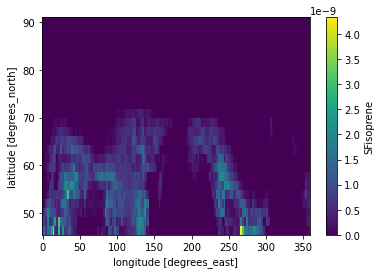

In [4]:
ds['SFisoprene'].where(ds['SFisoprene'].lat>45.).dropna('lat', how='all').sum('time').plot()

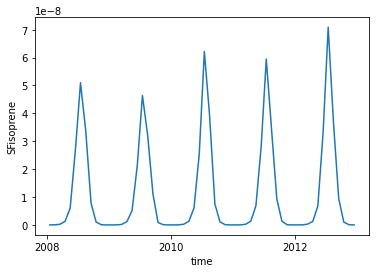

In [6]:
ds['SFisoprene'].where(ds['SFisoprene'].lat>45.).dropna('lat', how='all').sum('lat').sum('lon').plot()

In [5]:
import cartopy

In [6]:

path = '/cluster/home/adelez/nird/archive'
case_name = 'CTRL_2000_sec_nudg_f19_f19'
history_field='h2'
y=2000
input_path = path+'/'+ case_name+'/atm/hist'
print(input_path)

/cluster/home/adelez/nird/archive/CTRL_2000_sec_nudg_f19_f19/atm/hist


In [7]:
f'/{case_name}.cam.{history_field}.{y:04.0f}*.nc'

'/CTRL_2000_sec_nudg_f19_f19.cam.h2.2000*.nc'

In [20]:
ds = xr.open_dataset(processed_path+casealias+'_'+'RADIATIVE_'+date+'.nc')
ds

<xarray.Dataset>
Dimensions:   (time: 60, lat: 96, lon: 144, lev: 32)
Coordinates:
  * lat       (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon       (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time      (time) object 2008-01-15 00:00:00 ... 2012-12-15 00:00:00
Data variables:
    FLNT      (time, lat, lon) float32 ...
    FSNT      (time, lat, lon) float32 ...
    FLNT_DRF  (time, lat, lon) float32 ...
    FLNTCDRF  (time, lat, lon) float32 ...
    FSNTCDRF  (time, lat, lon) float32 ...
    FSNT_DRF  (time, lat, lon) float32 ...
    LHFLX     (time, lat, lon) float32 ...
    OMEGAT    (time, lev, lat, lon) float32 ...
    SHFLX     (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              VEG_SHIFT_IDEAL_2000_sec_nudg_f19_f19
    logname:           adelez
    host:              
    initial_file:      /cluster/shared/noresm/inputdata/atm/cam/inic/fv/cami-...
    topography_file:   /cluster/shared/noresm/inputdata/noresm-only/inputForN...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1